In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from sklearn import cluster
from sklearn.datasets.samples_generator import make_blobs
from skimage import filters
from skimage.color import rgb2gray
%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['figure.dpi'] = 150

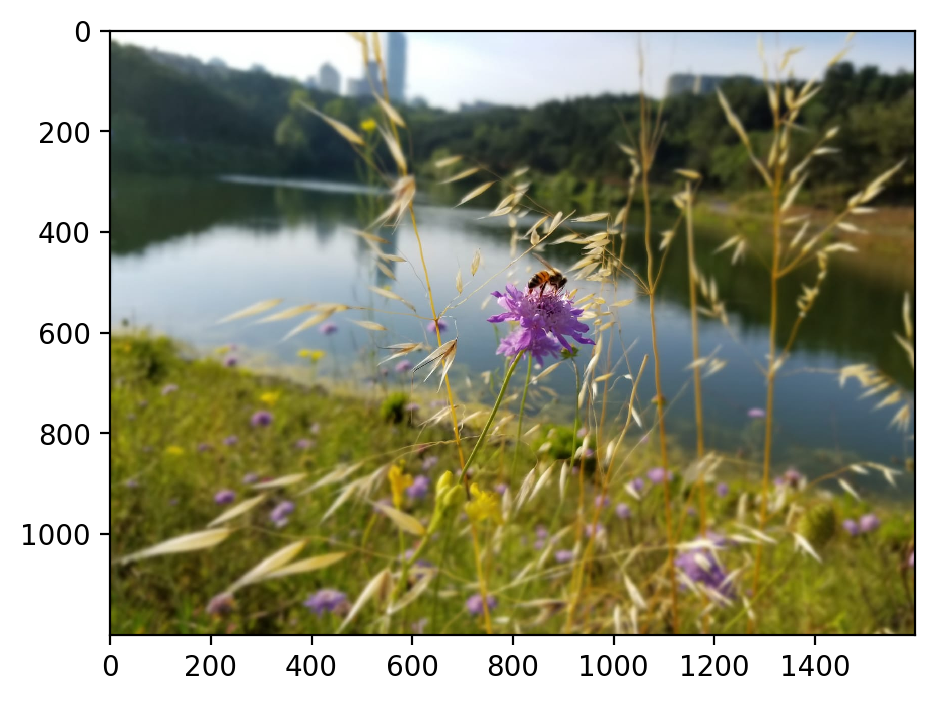

In [16]:
image = plt.imread('ITU_Golet_Ari.jpeg')
image.shape
plt.imshow(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


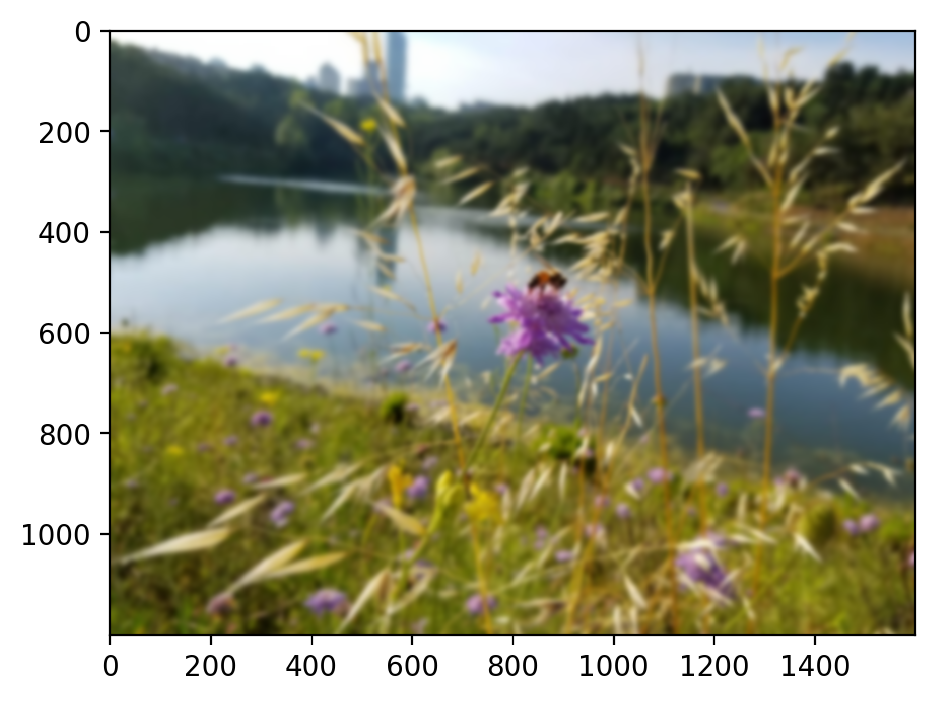

In [43]:
orginalBlurred = filters.gaussian(image, sigma=4.0)
plt.imshow(orginalBlurred)

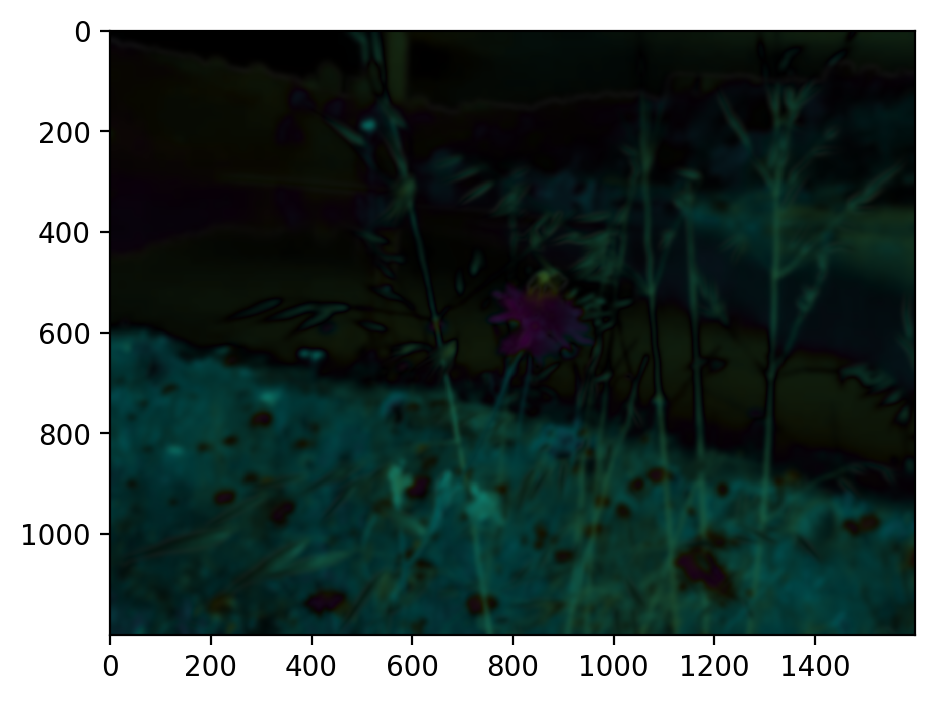

In [44]:
sobel = filters.sobel(orginalBlurred)
plt.imshow(sobel)

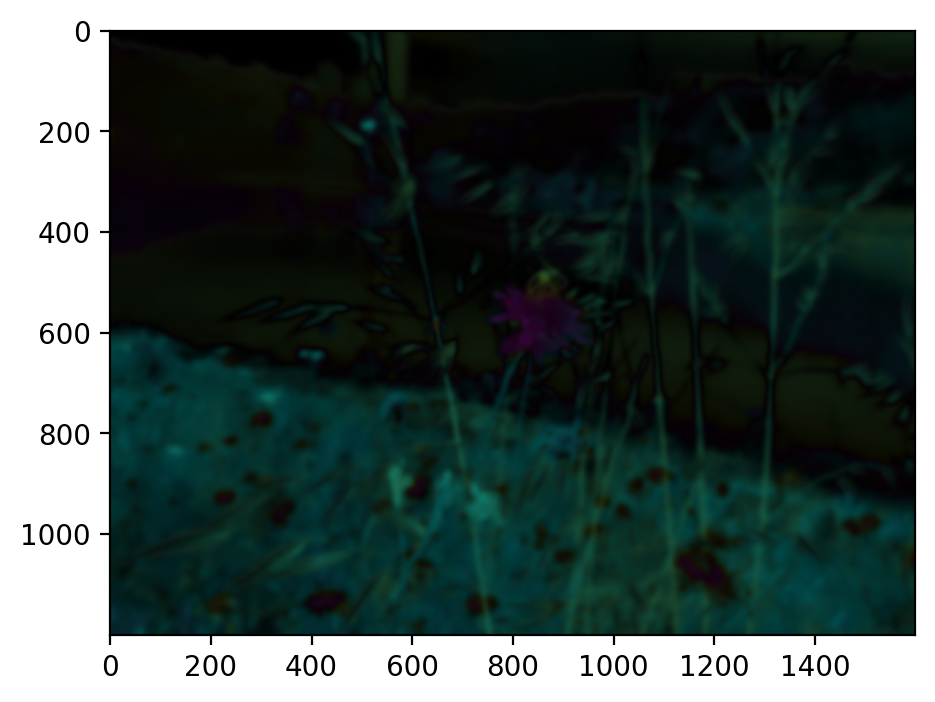

In [45]:
blurred = filters.gaussian(sobel, sigma=2.0)
plt.imshow(blurred)

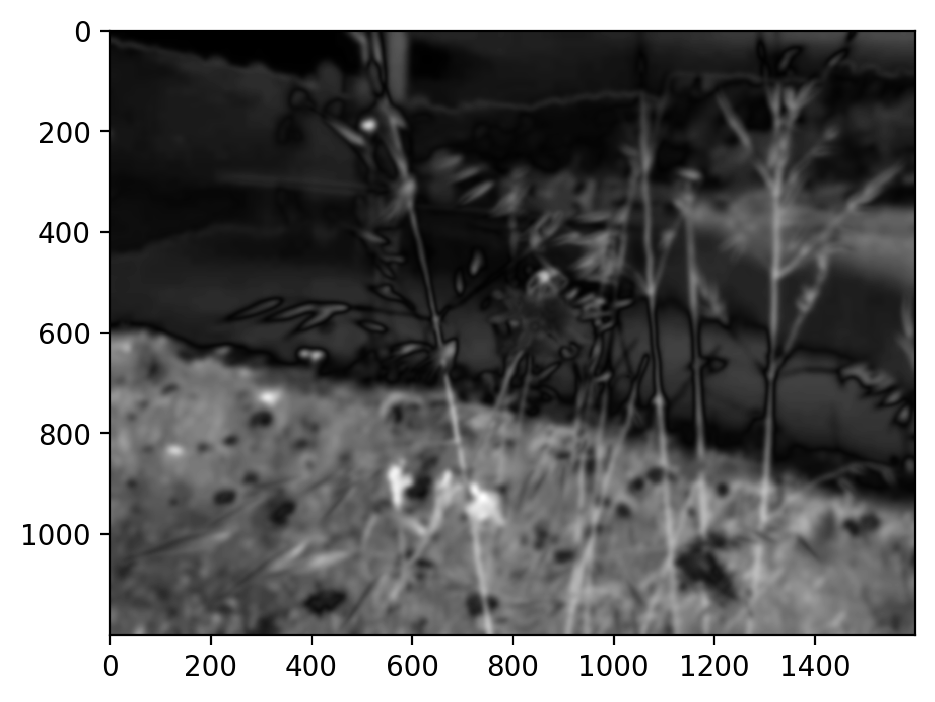

In [46]:
gray = rgb2gray(blurred)
plt.imshow(gray, cmap='gray')

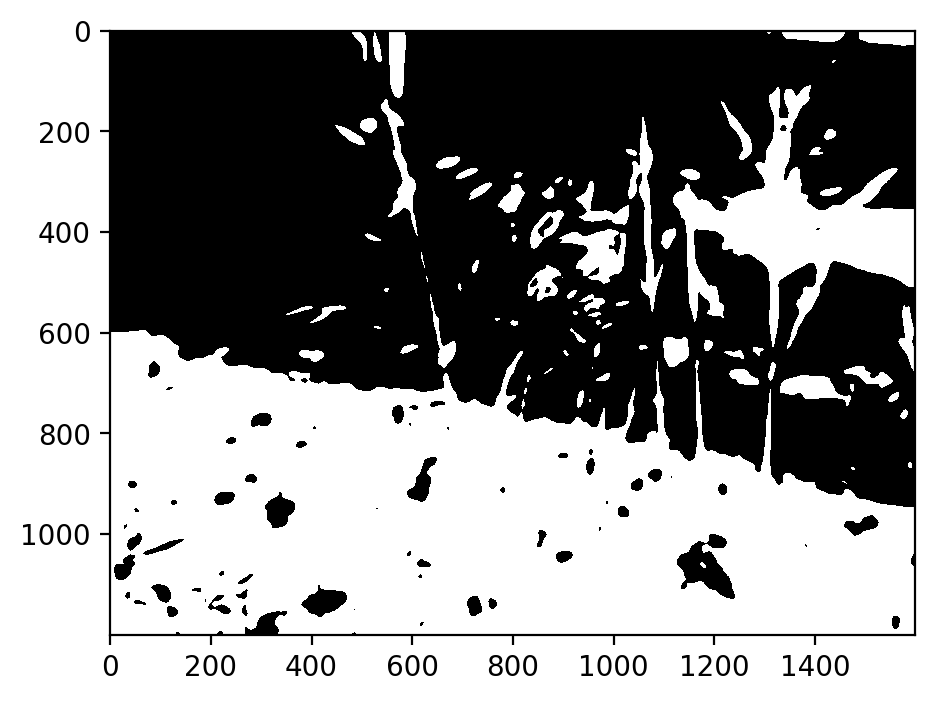

In [42]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
meanValue = gray_r.mean()
for i in range(gray_r.shape[0]):
    if gray_r[i] > meanValue:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
mask = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(mask, cmap='gray')

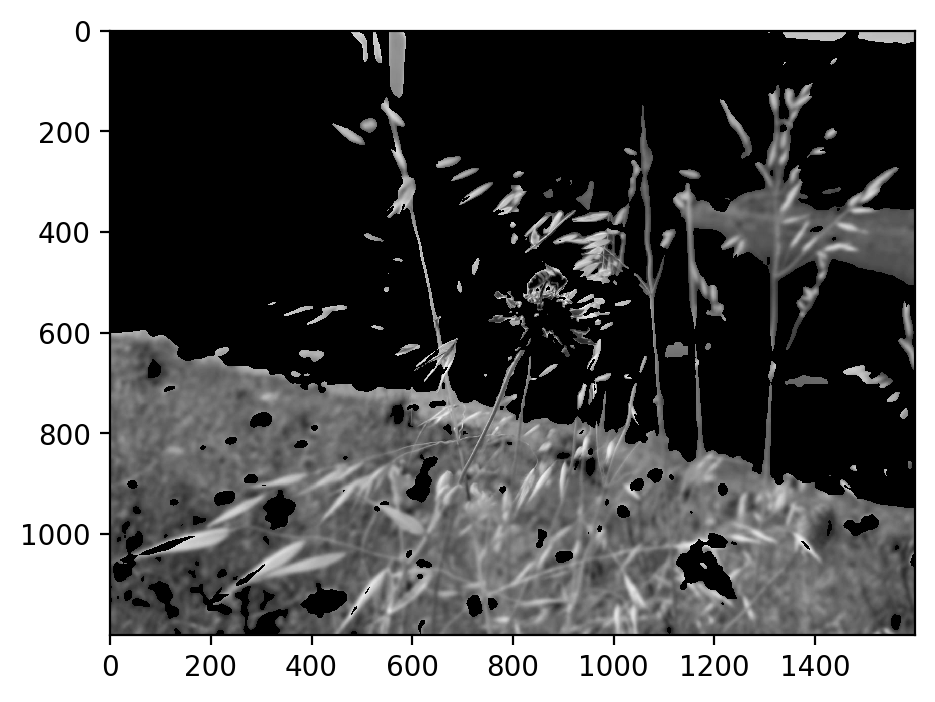

In [31]:
grayScale=rgb2gray(image)
bgRemoved = cv2.multiply(grayScale, mask)
plt.imshow(bgRemoved, cmap='gray')

In [20]:
def doMeanShiftOnGray(image, bandwidth=None):
    gimg = np.dot(image[..., :3], [0.333, 0.333, 0.333])
    x, y = gimg.shape
    algo_input = gimg.reshape(x*y, 1)
    if bandwidth is None:
        bandwidth = cluster.estimate_bandwidth(
            algo_input, quantile=0.1, n_samples=100)
    meanShift_cluster = cluster.MeanShift(
        bandwidth=bandwidth, bin_seeding=True)
    meanShift_cluster.fit(algo_input)
    cluster_centers = meanShift_cluster.cluster_centers_
    cluster_labels = meanShift_cluster.labels_
    print("number of predicted clusters : %d" % len(np.unique(cluster_labels)))
    resultImage = cluster_centers[cluster_labels].reshape(x, y)
    return resultImage.astype(int)

number of predicted clusters : 3


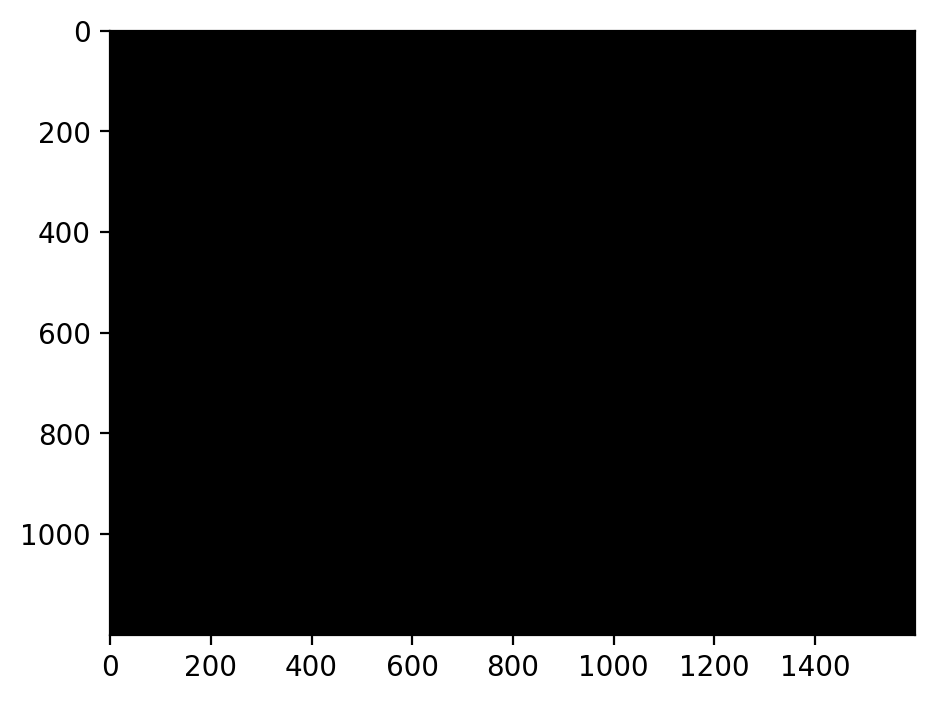

In [21]:
clusteredImage = doMeanShiftOnGray(blurred)
plt.imshow(clusteredImage)